In [112]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import copy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [113]:
def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


In [114]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
#df.to_csv('S&P500-Info.csv')
#df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])
tickers = df['Symbol'].array
tickers
#table

<PandasArray>
[ 'MMM',  'AOS',  'ABT', 'ABBV',  'ACN', 'ATVI',  'ADM', 'ADBE',  'ADP',
  'AES',
 ...
  'WTW',  'GWW', 'WYNN',  'XEL',  'XYL',  'YUM', 'ZBRA',  'ZBH', 'ZION',
  'ZTS']
Length: 503, dtype: object

In [115]:
ohlc_mon = {} # directory with ohlc value for each stock            
start = dt.datetime.today()-dt.timedelta(365*2)  - dt.timedelta(2) # last day of August 2021
 # last day of August 2023
end = dt.datetime.today() - dt.timedelta(3)
print(start)
print(end)
#yf.download(ticker[0],start,end,interval='1mo')

2021-09-01 13:34:55.739532
2023-08-31 13:34:55.739532


In [116]:
for ticker in tickers:
   ohlc_mon[ticker] = yf.download(ticker,start,end,interval='1mo')
   ohlc_mon[ticker].dropna(inplace=True,how="all")
 
tickers = ohlc_mon.keys() # redefine tickers variable after removing any tickers with corrupted data

################################Backtesting####################################

# calculating monthly return for each stock and consolidating return info by stock in a separate dataframe
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    print("calculating monthly return for ",ticker)
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1mo 2021-09-01 13:34:55.739532 -> 2023-08-31 13:34:55.739532)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

calculating monthly return for  CHTR
calculating monthly return for  CVX
calculating monthly return for  CMG
calculating monthly return for  CB
calculating monthly return for  CHD
calculating monthly return for  CI
calculating monthly return for  CINF
calculating monthly return for  CTAS
calculating monthly return for  CSCO
calculating monthly return for  C
calculating monthly return for  CFG
calculating monthly return for  CLX
calculating monthly return for  CME
calculating monthly return for  CMS
calculating monthly return for  KO
calculating monthly return for  CTSH
calculating monthly return for  CL
calculating monthly return for  CMCSA
calculating monthly return for  CMA
calculating monthly return for  CAG
calculating monthly return for  COP
calculating monthly return for  ED
calculating monthly return for  STZ
calculating monthly return for  CEG
calculating monthly return for  COO
calculating monthly return for  CPRT
calculating monthly return for  GLW
calculating monthly return 

C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

calculating monthly return for  HAS
calculating monthly return for  HCA
calculating monthly return for  PEAK
calculating monthly return for  HSIC
calculating monthly return for  HSY
calculating monthly return for  HES
calculating monthly return for  HPE
calculating monthly return for  HLT
calculating monthly return for  HOLX
calculating monthly return for  HD
calculating monthly return for  HON
calculating monthly return for  HRL
calculating monthly return for  HST
calculating monthly return for  HWM
calculating monthly return for  HPQ
calculating monthly return for  HUM
calculating monthly return for  HBAN
calculating monthly return for  HII
calculating monthly return for  IBM
calculating monthly return for  IEX
calculating monthly return for  IDXX
calculating monthly return for  ITW
calculating monthly return for  ILMN
calculating monthly return for  INCY
calculating monthly return for  IR
calculating monthly return for  PODD
calculating monthly return for  INTC
calculating monthly r

C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

calculating monthly return for  MSCI
calculating monthly return for  NDAQ
calculating monthly return for  NTAP
calculating monthly return for  NFLX
calculating monthly return for  NWL
calculating monthly return for  NEM
calculating monthly return for  NWSA
calculating monthly return for  NWS
calculating monthly return for  NEE
calculating monthly return for  NKE
calculating monthly return for  NI
calculating monthly return for  NDSN
calculating monthly return for  NSC
calculating monthly return for  NTRS
calculating monthly return for  NOC
calculating monthly return for  NCLH
calculating monthly return for  NRG
calculating monthly return for  NUE
calculating monthly return for  NVDA
calculating monthly return for  NVR
calculating monthly return for  NXPI
calculating monthly return for  ORLY
calculating monthly return for  OXY
calculating monthly return for  ODFL
calculating monthly return for  OMC
calculating monthly return for  ON
calculating monthly return for  OKE
calculating monthl

C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
C:\Users\amitk\AppData\Local\Temp\ipykernel_13200\2801606094.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [117]:
#return_df = return_df[1:]

#return_df.iloc[-2,].sort_values(ascending = False)[:5].index.values.tolist()
return_df
#ohlc_mon['AAPL']

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AES,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,0.018584,0.196496,0.091086,0.063039,0.121499,0.010337,0.070488,0.129646,0.128013,0.100745,...,0.045913,0.178217,0.059587,0.040544,0.055870,0.021503,0.035951,-0.020579,0.017774,0.113629
2021-11-01,-0.048355,0.086575,-0.020439,0.017508,-0.000917,-0.250544,-0.031600,0.029968,0.028509,-0.069638,...,-0.067855,0.039515,-0.097884,-0.013315,-0.072593,-0.016808,0.102688,-0.164338,0.001429,0.028238
2021-12-01,0.053138,0.086021,0.119027,0.174531,0.159905,0.135324,0.092519,-0.153452,0.067955,0.045633,...,0.051585,0.080151,0.049747,0.062294,-0.007674,0.134896,0.010904,0.062207,0.007124,0.099036
2022-01-01,-0.065361,-0.109843,-0.094358,0.011005,-0.147075,0.187585,0.109632,-0.057772,-0.160154,-0.087243,...,-0.011547,-0.044632,0.004821,0.036021,-0.124250,-0.098588,-0.144624,-0.029810,0.073781,-0.181289
2022-02-01,-0.104626,-0.099266,-0.050326,0.090681,-0.103911,0.031515,0.046000,-0.124686,-0.008391,-0.035955,...,-0.049838,-0.036457,0.012522,-0.033448,-0.153018,-0.020692,-0.188129,0.033897,0.045267,-0.029176
2022-03-01,0.011229,-0.068387,-0.018737,0.097043,0.067116,-0.017055,0.156653,-0.025787,0.112992,0.211964,...,0.062618,0.084896,-0.078363,0.071885,-0.038315,-0.028551,0.000871,0.035750,-0.070433,-0.026130
2022-04-01,-0.031301,-0.085459,-0.041061,-0.093949,-0.109332,-0.056298,-0.007756,-0.130964,-0.036356,-0.206374,...,-0.087349,-0.030555,-0.116127,0.022192,-0.055829,-0.012824,-0.106454,-0.054091,-0.138042,-0.060130
2022-05-01,0.035155,0.033525,0.039015,0.011863,-0.003367,0.036282,0.014069,0.051850,0.021817,0.087477,...,-0.017639,-0.025918,-0.062145,0.028392,0.046584,0.038116,-0.085132,-0.004472,0.009379,-0.033967


In [118]:
return_df.to_csv("./SP500_returns_Aug2023")

In [119]:

return_df = pd.read_csv("./SP500_returns_Aug2023")
return_df = return_df[1:]
#print(return_df[-1:].values.sort.tolist())
#drop columns with any missing values
print(return_df.shape)
return_df = return_df.dropna(axis=1)
print (return_df.shape)

(23, 504)
(23, 499)


In [120]:

#return_df #= return_df[1:]
#df.iloc[1,:].sort_values(ascending=False)[:fill].index.values.tolist()

In [121]:
return_df

,Date,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
1,2021-10-01,0.018584,0.196496,0.091086,0.063039,0.121499,0.010337,0.070488,0.129646,0.128013,...,0.045913,0.178217,0.059587,0.040544,0.055870,0.021503,0.035951,-0.020579,0.017774,0.113629
2,2021-11-01,-0.048355,0.086575,-0.020439,0.017508,-0.000917,-0.250544,-0.031600,0.029968,0.028509,...,-0.067855,0.039515,-0.097884,-0.013315,-0.072593,-0.016808,0.102688,-0.164338,0.001429,0.028238
3,2021-12-01,0.053138,0.086021,0.119027,0.174531,0.159905,0.135324,0.092519,-0.153452,0.067955,...,0.051585,0.080151,0.049747,0.062294,-0.007674,0.134896,0.010904,0.062207,0.007124,0.099036
4,2022-01-01,-0.065361,-0.109843,-0.094358,0.011005,-0.147075,0.187585,0.109632,-0.057772,-0.160154,...,-0.011547,-0.044632,0.004821,0.036021,-0.124250,-0.098588,-0.144624,-0.029810,0.073781,-0.181289
5,2022-02-01,-0.104626,-0.099266,-0.050326,0.090681,-0.103911,0.031515,0.046000,-0.124686,-0.008391,...,-0.049838,-0.036457,0.012522,-0.033448,-0.153018,-0.020692,-0.188129,0.033897,0.045267,-0.029176
6,2022-03-01,0.011229,-0.068387,-0.018737,0.097043,0.067116,-0.017055,0.156653,-0.025787,0.112992,...,0.062618,0.084896,-0.078363,0.071885,-0.038315,-0.028551,0.000871,0.035750,-0.070433,-0.026130
7,2022-04-01,-0.031301,-0.085459,-0.041061,-0.093949,-0.109332,-0.056298,-0.007756,-0.130964,-0.036356,...,-0.087349,-0.030555,-0.116127,0.022192,-0.055829,-0.012824,-0.106454,-0.054091,-0.138042,-0.060130
8,2022-05-01,0.035155,0.033525,0.039015,0.011863,-0.003367,0.036282,0.014069,0.051850,0.021817,...,-0.017639,-0.025918,-0.062145,0.028392,0.046584,0.038116,-0.085132,-0.004472,0.009379,-0.033967
9,2022-06-01,-0.124403,-0.090486,-0.075004,0.039289,-0.069725,-0.000257,-0.141624,-0.121062,-0.057863,...,-0.064813,-0.063680,-0.137973,-0.060791,-0.068638,-0.060900,-0.130814,-0.126030,-0.101424,0.005616
10,2022-07-01,0.106870,0.157096,0.001749,-0.063006,0.103043,0.026843,0.066624,0.120363,0.153425,...,0.052720,0.196070,0.114075,0.041633,0.177155,0.079553,0.216840,0.053108,0.071709,0.062016


In [122]:
def pflio(DF,m,x):
    """Returns cumulative portfolio return
    DF = dataframe with monthly return info for all stocks
    m = number of stock in the portfolio
    x = number of underperforming stocks to be removed from portfolio monthly"""
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            print("Bottom Stocks" + str(bad_stocks))
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        
        #Series containing the monthly returns of the stocks
        series1 = df.iloc[i,:].drop('Date')
        new_picks = series1.sort_values(ascending=False)[:fill].index.values.tolist()
        print("New Picks" + str(new_picks))
        portfolio = portfolio + new_picks;
        print("Month" + str(i) + " " + str(portfolio))
        monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

In [123]:

df1 = return_df.copy();


In [124]:
#sort Values
#df1.iloc[0,].sort_values(ascending=False)

sr1   = pd.Series(df1.iloc[-1,:])

df1['ZION']



#print(sr1.isnull().sum())
#print(sr1.shape[0])
#print(sr1.head())
#remove null values from a Series
#sr1.keys()
#remove a key from a Series
#sr2 = sr1.drop('Date')
#picks = sr2.sort_values(ascending=False)[:2].index.values.tolist()
#sort values
#sr2.sort_values(ascending=False)



1     0.017774
2     0.001429
3     0.007124
4     0.073781
5     0.045267
6    -0.070433
7    -0.138042
8     0.009379
9    -0.101424
10    0.071709
11    0.008799
12   -0.069308
13    0.021235
14   -0.002310
15   -0.043599
16    0.081367
17   -0.047780
18   -0.404098
19   -0.069161
20   -0.020459
21    0.001526
22    0.424051
23   -0.071895
Name: ZION, dtype: float64

In [125]:
month_ret = pflio(return_df,6,2)

CAGR(pflio(return_df,6,3))
print("Sharpe")
sharpe(pflio(return_df,6,3),0.025)
print("Max DD")
max_dd(pflio(return_df,6,3)) 


New Picks['ENPH', 'TSLA', 'SEDG', 'TER', 'FSLR', 'NVDA']
Month0 ['ENPH', 'TSLA', 'SEDG', 'TER', 'FSLR', 'NVDA']
Bottom Stocks['FSLR', 'SEDG']
New Picks['QCOM', 'AMD']
Month1 ['ENPH', 'TSLA', 'TER', 'NVDA', 'QCOM', 'AMD']
Bottom Stocks['ENPH', 'NVDA']
New Picks['FICO', 'LW']
Month2 ['TSLA', 'TER', 'QCOM', 'AMD', 'FICO', 'LW']
Bottom Stocks['TER', 'AMD']
New Picks['HAL', 'SLB']
Month3 ['TSLA', 'QCOM', 'FICO', 'LW', 'HAL', 'SLB']
Bottom Stocks['TSLA', 'FICO']
New Picks['SEDG', 'MOS']
Month4 ['QCOM', 'LW', 'HAL', 'SLB', 'SEDG', 'MOS']
Bottom Stocks['QCOM', 'LW']
New Picks['EQT', 'EPAM']
Month5 ['HAL', 'SLB', 'SEDG', 'MOS', 'EQT', 'EPAM']
Bottom Stocks['SEDG', 'EPAM']
New Picks['EQT', 'KMB']
Month6 ['HAL', 'SLB', 'MOS', 'EQT', 'EQT', 'KMB']
Bottom Stocks['KMB', 'MOS']
New Picks['ALB', 'NRG']
Month7 ['HAL', 'SLB', 'EQT', 'EQT', 'ALB', 'NRG']
Bottom Stocks['EQT', 'EQT']
New Picks['DG', 'GIS']
Month8 ['HAL', 'SLB', 'ALB', 'NRG', 'DG', 'GIS']
Bottom Stocks['HAL', 'NRG']
New Picks['FSLR', 'ENPH'

0.17714341987960627

In [126]:
#DJI = yf.download("^GSPC",dt.date.today()-dt.timedelta(365),dt.date.today(),interval='1mo')
#DJI["mon_ret"] = DJI["Adj Close"].pct_change().fillna(0)

DJI = yf.download("SPY",dt.date.today()-dt.timedelta(365*2),dt.date.today(),interval='1mo')
DJI["mon_ret"] = DJI["Adj Close"].pct_change().fillna(0)
CAGR(DJI)
sharpe(DJI,0.025)
max_dd(DJI)
#DJI


[*********************100%***********************]  1 of 1 completed


0.23972218879086007

New Picks['ENPH', 'TSLA', 'SEDG', 'TER', 'FSLR', 'NVDA']
Month0 ['ENPH', 'TSLA', 'SEDG', 'TER', 'FSLR', 'NVDA']
Bottom Stocks['FSLR', 'SEDG', 'TSLA']
New Picks['QCOM', 'AMD', 'NVDA']
Month1 ['ENPH', 'TER', 'NVDA', 'QCOM', 'AMD', 'NVDA']
Bottom Stocks['ENPH', 'NVDA', 'NVDA']
New Picks['FICO', 'LW', 'EW']
Month2 ['TER', 'QCOM', 'AMD', 'FICO', 'LW', 'EW']
Bottom Stocks['TER', 'AMD', 'EW']
New Picks['HAL', 'SLB', 'OXY']
Month3 ['QCOM', 'FICO', 'LW', 'HAL', 'SLB', 'OXY']
Bottom Stocks['FICO', 'QCOM', 'SLB']
New Picks['SEDG', 'MOS', 'NUE']
Month4 ['LW', 'HAL', 'OXY', 'SEDG', 'MOS', 'NUE']
Bottom Stocks['LW', 'SEDG', 'NUE']
New Picks['EQT', 'EPAM', 'OXY']
Month5 ['HAL', 'OXY', 'MOS', 'EQT', 'EPAM', 'OXY']
Bottom Stocks['EPAM', 'MOS', 'HAL']
New Picks['EQT', 'KMB', 'MHK']
Month6 ['OXY', 'EQT', 'OXY', 'EQT', 'KMB', 'MHK']
Bottom Stocks['KMB', 'MHK', 'EQT']
New Picks['ALB', 'NRG', 'DVN', 'EPAM']
Month7 ['OXY', 'OXY', 'ALB', 'NRG', 'DVN', 'EPAM']
Bottom Stocks['DVN', 'ALB', 'NRG']
New Picks['DG',

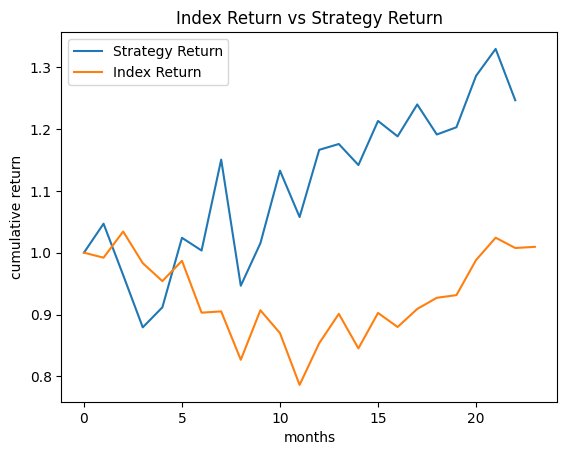

In [127]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

In [128]:
# Select last 2 rows of return_df
return_df_2 = return_df[-2:]

return_df_2
pflio(return_df_2,6,3)

New Picks['ZION', 'KEY', 'CMA', 'NWL', 'CFG', 'USB']
Month0 ['ZION', 'KEY', 'CMA', 'NWL', 'CFG', 'USB']
Bottom Stocks['CFG', 'CMA', 'KEY']
New Picks['ANET', 'LLY', 'GPN']
Month1 ['ZION', 'NWL', 'USB', 'ANET', 'LLY', 'GPN']


,mon_ret
0,0.00000
1,-0.08655


In [129]:
return_df[-2:]

,Date,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
22,2023-07-01,0.113997,-0.002061,0.021189,0.110221,0.025180,0.100356,0.124405,0.116935,0.131517,...,-0.099382,-0.063531,0.031910,0.017388,0.001154,-0.006352,0.041003,-0.049590,0.424051,0.092213
23,2023-08-01,-0.043318,0.002291,-0.071288,-0.006624,0.027169,-0.008301,-0.066620,0.024113,0.029726,...,-0.021625,-0.032973,-0.069738,-0.089271,-0.081685,-0.060216,-0.106994,-0.137749,-0.071895,0.015094


In [130]:
#show multiple columns of a df
#return_df [['Date','ZION', 'KEY', 'CMA', 'NWL', 'CFG', 'USB','ANET', 'LLY', 'GPN']]
#plot a df
#return_df [['ZION', 'KEY', 'CMA', 'NWL', 'CFG', 'USB','ANET', 'LLY', 'GPN']]

#without the date column

cum_df = return_df[-2:].cumsum()
#sort the cumulative returns
cum_df.iloc[-1,:].sort_values(ascending=False)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'